# 配置环境

In [1]:
! pip install onnxruntime

In [15]:
! pip install heimarobot==0.0.3

In [29]:
from heimarobot import FaceDetection
import numpy as np
import cv2 as cv 
# import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

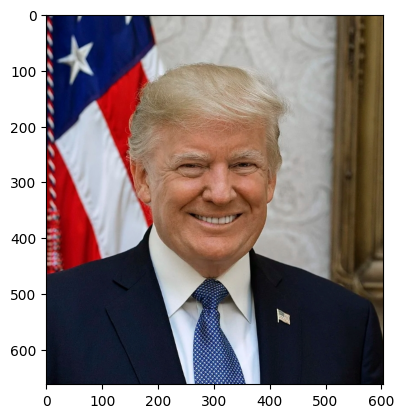

In [17]:
trump1 = cv.imread("img/trump1.jpg")
imshow(trump1)

# 人脸检测

In [24]:
face_detection = FaceDetection()
faces = face_detection.predict(trump1)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
(640, 640)


In [25]:
for face in faces:
    print(face)

{'bbox': array([186.14355, 179.34421, 396.39413, 437.73013], dtype=float32), 'kps': array([[258.11664, 269.17368],
       [354.16547, 268.3584 ],
       [315.37576, 332.01993],
       [252.06586, 354.914  ],
       [352.30978, 354.28726]], dtype=float32), 'det_score': 0.8584292}


## 将人脸框出来

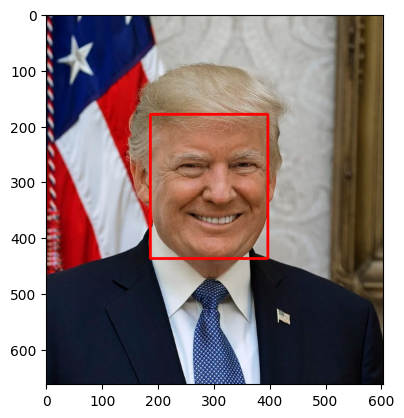

In [26]:
x1,y1,x2,y2 = np.intp(face.bbox)
dst_face = trump1.copy()
cv.rectangle(dst_face,(x1,y1),(x2,y2),(0,0,255),3)
imshow(dst_face)

## 显示关键点

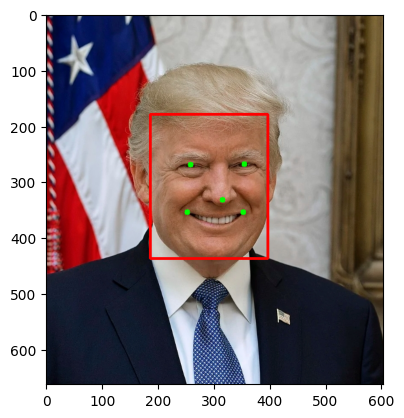

In [30]:
for kp in faces[0].kps:
    p = np.intp(kp)
    cv.circle(dst_face,p,5,(0,255,0),-1)
imshow(dst_face)

## 人脸属性检测

In [38]:
from heimarobot import FaceAttribute
face_attribute = FaceAttribute()
img = cv.imread("img/trump1.jpg")
# 预测人的年龄和性别
faces = face_attribute.predict(img)
faces

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
(640, 640)


[{'bbox': array([186.14355, 179.34421, 396.39413, 437.73013], dtype=float32),
  'kps': array([[258.11664, 269.17368],
         [354.16547, 268.3584 ],
         [315.37576, 332.01993],
         [252.06586, 354.914  ],
         [352.30978, 354.28726]], dtype=float32),
  'det_score': 0.8584292,
  'gender': 1,
  'age': 77}]

## 检测人脸的106个特征点

In [39]:
from heimarobot import FaceLandmark
face_landmark = FaceLandmark()
faces = face_landmark.predict(img)
print(faces)

d:\instal\Anaconda3\envs\torchenv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
(640, 640)
[{'bbox': array([186.14355, 179.34421, 396.39413, 437.73013], dtype=float32), 'kps': array([[258.11664, 269.17368],
       [354.16547, 268.3584 ],
       [315.37576, 332.01993],
       [252.06586, 354.914  ],
       [352.30978, 354.28726]], dtype=float32), 'det_score': 0.8584292, 'landmark_2d_106': array([[308.44543, 439.44974],
       [187.87428, 260.06476],
       [211.7518 , 390.7823 ],
       [222.035  , 401.8196 ],
       [233.79309, 411.46823],
       [246.42256, 420.0153 ],
       [260.0171 , 427.9882 ],
       [274.77362, 434.4953 ],
       [290.86563, 438.64786],
       [186.86385, 275.4905 ],
       [186.46725, 290.63666],
       [186.68932, 305.63824],
       [187.7316 , 320.50696],
       [189.62357, 335.4556 ],
       [192.47679, 350.411  ],
       [196.7222 , 364.9485 ],
       [203.20995

(106, 2)


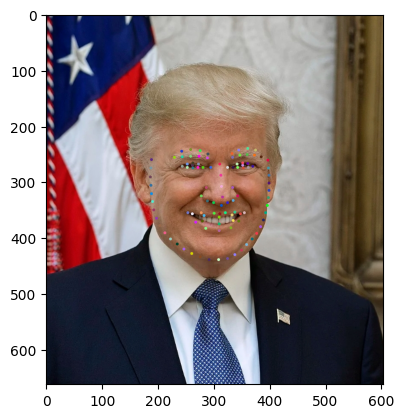

In [41]:
from heimarobot import draw_landmarks
rst = draw_landmarks(img,faces)
imshow(rst)

## 人脸识别

In [44]:
from heimarobot import FaceRecognition
img1 = cv.imread("img/trump1.jpg")
img2 = cv.imread("img/trump2.jpg")
face_recognition = FaceRecognition()
# 获取人脸特征
faces1 = face_recognition.predict(img1)
faces2 = face_recognition.predict(img2)
# 比较人脸相似度
sim = face_recognition.compute_sim(faces1,faces2)

d:\instal\Anaconda3\envs\torchenv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
(640, 640)
(640, 640)


In [45]:
# 设定阈值
if sim >= 0.5:
    print("success")
else:
    print("faild")

success
